In [1]:
# ------------------------------------------------------------------------------
# Set training variables
# ------------------------------------------------------------------------------

# System level
import sys

# Arrays
import numpy as np

# Keras (www.keras.io)
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Activation, Dropout, merge, Concatenate
from keras.layers import Conv2D, MaxPooling2D, Convolution2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

# Sklearn (for machine learning)
from sklearn import metrics

# Plots
import matplotlib.cm as cm
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
try:
    import seaborn as sns
except:
    pass

Using TensorFlow backend.


In [15]:
from astropy.table import Table

In [54]:
def make_branch(x):
    c00 = Conv2D(nb_filter=32, kernel_size=(6,6), strides=1, activation='softplus')(x)
    p00 = MaxPooling2D(pool_size=(2, 2))(c00)
    c01 = Conv2D(nb_filter=64, kernel_size=(5,5), strides=1, activation='softplus')(p00)
    p01 = MaxPooling2D(pool_size=(2, 2))(c01)
    c02 = Conv2D(nb_filter=128, kernel_size=(3,3), strides=1, activation='softplus')(p01)
    c03 = Conv2D(nb_filter=128, kernel_size=(3,3), strides=1, activation='softplus')(c02)
    p03 = MaxPooling2D(pool_size=(2, 2))(c03)
    f03 = Flatten()(p03)
    return f03

In [17]:
metadata = Table.read('/Users/jegpeek/Dropbox/xorastro/top10k_meta', format='ascii.html')
perspectives = np.load('/Users/jegpeek/Dropbox/xorastro/perspectives.npy')

In [11]:
perspectives.shape

(45, 45, 10000, 2, 2, 2, 2)

In [109]:
colorall = metadata[:]['g']-metadata[:]['i']
colorcut = ((colorall > 0.6) & (colorall < 1.7))
color = colorall[np.where(colorcut)]
len(color)

9444

In [130]:
perspectives_rs_all = perspectives.reshape(45, 45, 10000, 16)
persepctives_rs = perspectives_rs_all[:, :, np.where(colorcut)[0], :]
traindata = perspectives_rs[:, :, 0:8000,:]
validdata = perspectives_rs[:, :, 8000:9000,:]
testdata = persepctives_rs[:, :, 9000:, :]

In [133]:
traindata.shape

(45, 45, 8000, 16)

In [135]:
cc_train = []
cc_valid = []
cc_test = []
for i in range(16):
    cc_train.append(np.rollaxis(traindata[:,:,:,i].reshape([45, 45,1, 8000]), 3))
    cc_valid.append(np.rollaxis(validdata[:,:,:,i].reshape([45, 45, 1,1000]), 3))
    cc_test.append(np.rollaxis(testdata[:,:,:,i].reshape([45, 45, 1, 444]), 3))

In [137]:
cc_test[0].shape

(444, 45, 45, 1)

In [138]:
y_train = color[0:8000]
y_valid= color[8000:9000]
y_test = color[9000:]

In [140]:
y_test.shape

(444,)

In [146]:
print(np.sum((color-np.mean(color))**2)/len(color))

0.0560136102531


In [55]:
# ------------------------------------------------------------------------------
# Set up model architecture
# see Figure 4, Figure 8, and Table 2 of Dielemannnnn paper
# ------------------------------------------------------------------------------

# Define architecture for model
#data_shape = [45, 45] #np.shape(x_data)
input_shape = (45, 45, 1)

# merge via concatenation
#branch_list = []
# DOING IT THE HARD WAY   
#x00 = Input(shape=input_shape)
#c00_0 = Conv2D(nb_filter=32, kernel_size=(6,6), strides=1, activation='softplus')(x00)
#p00_0 = MaxPooling2D(pool_size=(2, 2))(c00_0)
#c00_1 = Conv2D(nb_filter=64, kernel_size=(5,5), strides=1, activation='softplus')(p00_0)
#p00_1 = MaxPooling2D(pool_size=(2, 2))(c00_1)
#c00_2 = Conv2D(nb_filter=128, kernel_size=(3,3), strides=1, activation='softplus')(p00_1)
#c00_3 = Conv2D(nb_filter=128, kernel_size=(3,3), strides=1, activation='softplus')(c00_2)
#p00_3 = MaxPooling2D(pool_size=(2, 2))(c00_3)
'''
x00 = Input(shape=input_shape)
c00_0 = Conv2D(nb_filter=32, kernel_size=(6,6), strides=1, activation='softplus')(x00)
p00_0 = MaxPooling2D(pool_size=(2, 2))(c00_0)
c00_1 = Conv2D(nb_filter=64, kernel_size=(5,5), strides=1, activation='softplus')(p00_0)
p00_1 = MaxPooling2D(pool_size=(2, 2))(c00_1)
c02 = Conv2D(nb_filter=128, kernel_size=(3,3), strides=1, activation='softplus')(p00_1)
c03 = Conv2D(nb_filter=128, kernel_size=(3,3), strides=1, activation='softplus')(c02)
p03 = MaxPooling2D(pool_size=(2, 2))(c03)
'''
x00 = Input(shape=input_shape)
x01 = Input(shape=input_shape)
x02 = Input(shape=input_shape)
x03 = Input(shape=input_shape)
x04 = Input(shape=input_shape)
x05 = Input(shape=input_shape)
x06 = Input(shape=input_shape)
x07 = Input(shape=input_shape)
x08 = Input(shape=input_shape)
x09 = Input(shape=input_shape)
x10 = Input(shape=input_shape)
x11 = Input(shape=input_shape)
x12 = Input(shape=input_shape)
x13 = Input(shape=input_shape)
x14 = Input(shape=input_shape)
x15 = Input(shape=input_shape)

#a1 = make_branch(input_shape)
#a2 = make_branch(input_shape)
merge = Concatenate()([make_branch(x00),make_branch(x01),make_branch(x02),make_branch(x03),make_branch(x04),make_branch(x05),make_branch(x06),make_branch(x07),make_branch(x08),make_branch(x09),make_branch(x10),make_branch(x11),make_branch(x12),make_branch(x13),make_branch(x14),make_branch(x15)]) #[a1, a2])
#([make_branch() for i in range(16)])

# Dense layers
d0 = Dense(2048)(merge)
d1 = Dense(2048)(d0)

#output layer
y = Dense(1)(d1)

model = Model(input=[x00,x01,x02, x03,x04,x05,x06,x07,x08,x09,x10,x11,x12,x13,x14,x15], outputs=y)

optimizer = 'adadelta'
metrics_model = ['accuracy']
loss = 'mse'
model.compile(loss=loss, optimizer=optimizer, metrics=metrics_model)
model.summary()

/Users/jegpeek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="softplus", strides=1, kernel_size=(6, 6), filters=32)`
  from ipykernel import kernelapp as app
/Users/jegpeek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="softplus", strides=1, kernel_size=(5, 5), filters=64)`
/Users/jegpeek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="softplus", strides=1, kernel_size=(3, 3), filters=128)`
/Users/jegpeek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="softplus", strides=1, kernel_size=(3, 3), filters=128)`


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_25 (InputLayer)            (None, 45, 45, 1)     0                                            
____________________________________________________________________________________________________
input_26 (InputLayer)            (None, 45, 45, 1)     0                                            
____________________________________________________________________________________________________
input_27 (InputLayer)            (None, 45, 45, 1)     0                                            
____________________________________________________________________________________________________
input_28 (InputLayer)            (None, 45, 45, 1)     0                                            
___________________________________________________________________________________________

/Users/jegpeek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:60: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=[<tf.Tenso...)`


In [147]:
model.fit(x=cc_train, y=y_train, batch_size=16, epochs=12, validation_data=(cc_valid,y_valid))

Train on 8000 samples, validate on 1000 samples
Epoch 1/1
8000/8000 [==============================] - 370s - loss: 0.0570 - acc: 1.2500e-04 - val_loss: 0.0546 - val_acc: 0.0000e+00


In [148]:
valid_color = model.predict(cc_valid)

(0, 2)

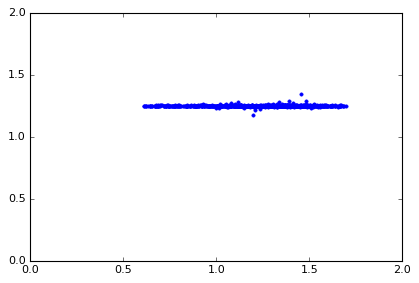

In [149]:
plt.plot(y_valid,valid_color, '.')
plt.xlim([0, 2])
plt.ylim([0, 2])